# Impact of Duplicate Data while Training the ML Model

# 1.REGRESSION TECHNIQUES

# Model Behaviour on Original dataset

In [ ]:
#Dataset used ---> BoustonHousing Dataset
#Models Used --> All Regression Classifier

# DataCleaning

In [81]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


data_frame = pandas.read_csv('HousingData.csv')

    
#Removing Null Valued Attributes
df_attributes = data_frame.columns.tolist()
null_valued_attributes = []
for attribute in df_attributes:
    if(data_frame[attribute].isnull().any()):
        null_valued_attributes.append(attribute)
print("The Null Valued Attributes in the Dataset are",null_valued_attributes)

print("The Ratio of NullValue Presence in Dataset",(len(null_valued_attributes)/len(df_attributes))*100,"Percentage")
#removing all the null valued rows in the dataframe

clean_data_frame = data_frame.dropna()

The Null Valued Attributes in the Dataset are ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']
The Ratio of NullValue Presence in Dataset 42.857142857142854 Percentage


# Fitting Regression Models on the Original Data

In [2]:
X = clean_data_frame.drop('MEDV',axis = 1)
y = clean_data_frame['MEDV']


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)


Model11 = LinearRegression()
Model11.fit(X_train,y_train)
y_pred11 = Model11.predict(X_test)
mse_error11 = mean_squared_error(y_test,y_pred11)
accuracy11 = r2_score(y_test,y_pred11)
print("The MeanSqaured Error of the Model",mse_error11)
print("The Accuracy of the Model",accuracy11*100)




Model12 = Lasso(alpha = 0.1)
Model12.fit(X_train,y_train)
y_pred12 = Model12.predict(X_test)
mse_error12 = mean_squared_error(y_test,y_pred12)
accuracy12 = r2_score(y_test,y_pred12)
print("The MeanSqaured Error of the Model",mse_error12)
print("The Accuracy of the Model",accuracy12*100)



Model13 = Ridge(alpha = 2)
Model13.fit(X_train,y_train)
y_pred13 = Model13.predict(X_test)
mse_error13 = mean_squared_error(y_test,y_pred13)
accuracy13 = r2_score(y_test,y_pred13)
print("The MeanSqaured Error of the Model",mse_error13)
print("The Accuracy of the Model",accuracy13*100)




Model14 = ElasticNet(alpha = 1)
Model14.fit(X_train,y_train)
y_pred14 = Model14.predict(X_test)
mse_error14 = mean_squared_error(y_test,y_pred14)
accuracy14 = r2_score(y_test,y_pred14)
print("The MeanSqaured Error of the Model",mse_error14)
print("The Accuracy of the Model",accuracy14*100)

The MeanSqaured Error of the Model 17.857914667618243
The Accuracy of the Model 79.59041647709702
The MeanSqaured Error of the Model 17.82044703646715
The Accuracy of the Model 79.63323775615545
The MeanSqaured Error of the Model 17.756485674630998
The Accuracy of the Model 79.70633838301647
The MeanSqaured Error of the Model 20.034279965734164
The Accuracy of the Model 77.10307626100847


# Adding Some Duplicated Data to the DataFrame to Dataset

In [92]:
duplicated_data_frame = clean_data_frame.copy()
duplicated_data_frame.reset_index(drop = True,inplace = True)
#Adding 100 duplicated random row
for count in range(100):
    duplicated_data_frame.loc[len(duplicated_data_frame)] = duplicated_data_frame.iloc[random.randint(0,len(duplicated_data_frame)-1)].tolist()

# Fitting Regression Models on the Duplicated Data

In [95]:
X = duplicated_data_frame.drop('MEDV',axis = 1)
y = duplicated_data_frame['MEDV']


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

Model21 = LinearRegression()
Model21.fit(X_train, y_train)
y_pred21 = Model21.predict(X_test)
mse_error21 = mean_squared_error(y_test, y_pred21)
accuracy21 = r2_score(y_test, y_pred21)
print("The MeanSquared Error of the Model", mse_error21)
print("The Accuracy of the Model", accuracy21 * 100)

Model22 = Lasso(alpha=0.2)
Model22.fit(X_train, y_train)
y_pred22 = Model22.predict(X_test)
mse_error22 = mean_squared_error(y_test, y_pred22)
accuracy22 = r2_score(y_test, y_pred22)
print("The MeanSquared Error of the Model", mse_error22)
print("The Accuracy of the Model", accuracy22 * 100)

Model23 = Ridge(alpha=2)
Model23.fit(X_train, y_train)
y_pred23 = Model23.predict(X_test)
mse_error23 = mean_squared_error(y_test, y_pred23)
accuracy23 = r2_score(y_test, y_pred23)
print("The MeanSquared Error of the Model", mse_error23)
print("The Accuracy of the Model", accuracy23 * 100)

Model24 = ElasticNet(alpha=2)
Model24.fit(X_train, y_train)
y_pred24 = Model24.predict(X_test)
mse_error24 = mean_squared_error(y_test, y_pred24)
accuracy24 = r2_score(y_test, y_pred24)
print("The MeanSquared Error of the Model", mse_error24)
print("The Accuracy of the Model", accuracy24 * 100)

The MeanSquared Error of the Model 25.023686101094487
The Accuracy of the Model 71.73503632736295
The MeanSquared Error of the Model 27.775086666737202
The Accuracy of the Model 68.62725129830748
The MeanSquared Error of the Model 25.506971670747163
The Accuracy of the Model 71.18915155984482
The MeanSquared Error of the Model 34.43273542241158
The Accuracy of the Model 61.107248071601305


# Obsrvations

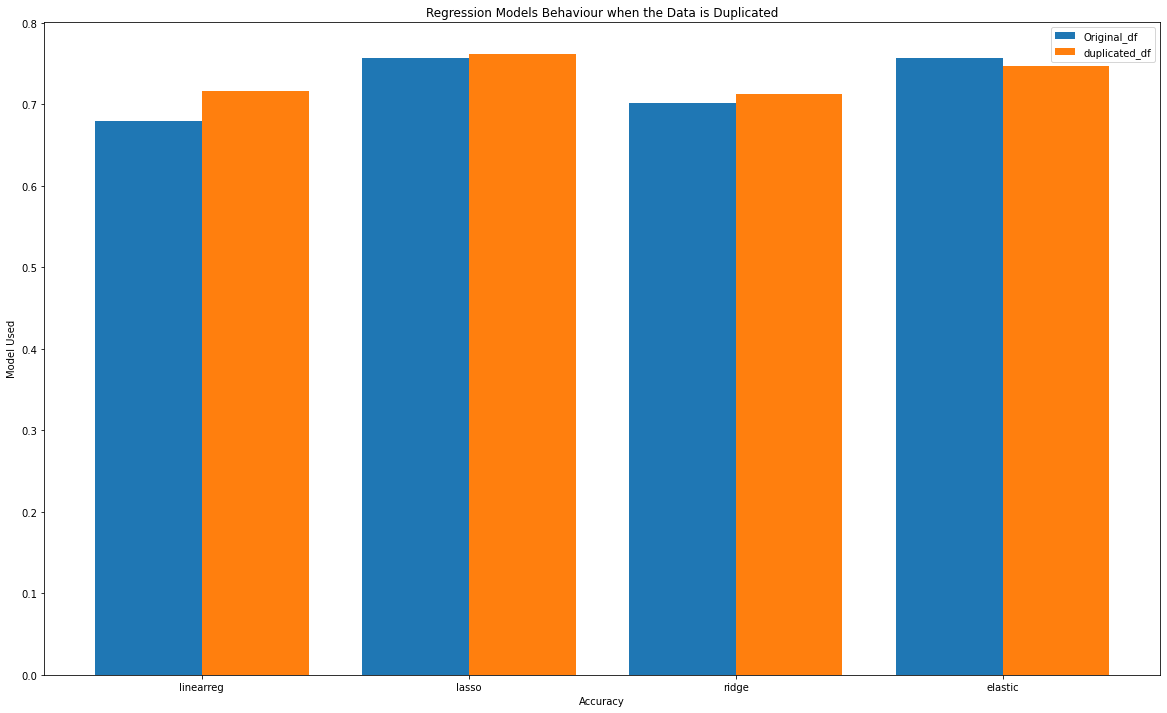

In [120]:
import matplotlib.pyplot as plt
import numpy as np
original_df_accuracies = [accuracy11, accuracy12, accuracy13,accuracy14]
duplicated_df_accuracies  = [accuracy21, accuracy22, accuracy23, accuracy24]
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(12)
model_names = ['linearreg','lasso','ridge','elastic']
X_axis = np.arange(len(model_names))
plt.bar(X_axis - 0.2,original_df_accuracies, 0.4, label = 'Original_df')
plt.bar(X_axis + 0.2,duplicated_df_accuracies, 0.4, label = 'duplicated_df')
plt.xticks(X_axis, model_names)
plt.title("Regression Models Behaviour when the Data is Duplicated")
plt.xlabel("Accuracy")
plt.ylabel("Model Used")
plt.legend()
plt.show()

# 1.CLASSIFICATION TECHNIQUES

In [ ]:
#Dataset used -----> Diabetes.csv
#Models used ------> Classification models

# Fitting Classification Models on the Original Data

In [121]:
#Importing the Libraries



import pandas
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import matplotlib.pyplot as plt





#Data Preparation
data_frame = pandas.read_csv("diabetes.csv")
X = data_frame[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].values.tolist()
y = data_frame['Outcome'].values.tolist()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)





#1.Decision Tree Classifier
DTClassifier = DecisionTreeClassifier()
DTClassifier.fit(X_train,y_train)
y_pred1 = DTClassifier.predict(X_test)
accuracy11 = accuracy_score(y_pred1,y_test)




#2.LogisticRegression Classifier
LRModel = LogisticRegression(max_iter = 1000)
LRModel.fit(X_train,y_train)
y_pred2 = LRModel.predict(X_test)
accuracy12 = accuracy_score(y_pred2,y_test)


#3.KNNClassifier
KNNClassifier = KNeighborsClassifier()
KNNClassifier.fit(X_train,y_train)
y_pred3 = KNNClassifier.predict(X_test)
accuracy13 = accuracy_score(y_pred3,y_test)




#Svm classifier
svc_classifier = SVC()
svc_classifier.fit(X_train,y_train)
y_pred4 = svc_classifier.predict(X_test)
accuracy14 = accuracy_score(y_pred4,y_test)



#Max Voting Ensemble Technique
ensemble_model1 =  VotingClassifier(estimators = [('dt',DTClassifier),('lr',LRModel),('knn',KNNClassifier),('svc',svc_classifier)],voting = "hard")
ensemble_model1.fit(X_train,y_train)
y_pred5 = ensemble_model1.predict(X_test)
accuracy15 = accuracy_score(y_pred5,y_test)



#Bagging Classifier
bagging_model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
bagging_model.fit(X_train, y_train)
accuracy16 = bagging_model.score(X_test,y_test)

#RandomForestClassifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)
accuracy17 = rfc_model.score(X_test,y_test)


#GradientBoostingClassifier
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)
accuracy18 = gbc_model.score(X_test,y_test)

#xgboost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
accuracy19 = xgb_model.score(X_test,y_test)


# Adding some Duplicate data

In [122]:
duplicated_data_frame = data_frame.copy()
duplicated_data_frame.reset_index(drop = True,inplace = True)
#Adding 100 duplicated random row
for count in range(100):
    duplicated_data_frame.loc[len(duplicated_data_frame)] = duplicated_data_frame.iloc[random.randint(0,len(duplicated_data_frame)-1)].tolist()


# Fitting Classsification Models on the Duplicated Data

In [123]:

X = duplicated_data_frame[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].values.tolist()
y = duplicated_data_frame['Outcome'].values.tolist()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)





#1.Decision Tree Classifier
DTClassifier = DecisionTreeClassifier()
DTClassifier.fit(X_train,y_train)
y_pred1 = DTClassifier.predict(X_test)
accuracy21 = accuracy_score(y_pred1,y_test)



#2.LogisticRegression Classifier
LRModel = LogisticRegression(max_iter = 1000)
LRModel.fit(X_train,y_train)
y_pred2 = LRModel.predict(X_test)
accuracy22 = accuracy_score(y_pred2,y_test)


#3.KNNClassifier
KNNClassifier = KNeighborsClassifier()
KNNClassifier.fit(X_train,y_train)
y_pred3 = KNNClassifier.predict(X_test)
accuracy23 = accuracy_score(y_pred3,y_test)




#Svm classifier
svc_classifier = SVC()
svc_classifier.fit(X_train,y_train)
y_pred4 = svc_classifier.predict(X_test)
accuracy24 = accuracy_score(y_pred4,y_test)


#Max Voting Ensemble Technique
ensemble_model1 =  VotingClassifier(estimators = [('dt',DTClassifier),('lr',LRModel),('knn',KNNClassifier),('svc',svc_classifier)],voting = "hard")
ensemble_model1.fit(X_train,y_train)
y_pred5 = ensemble_model1.predict(X_test)
accuracy25 = accuracy_score(y_pred5,y_test)




#Bagging Classifier
bagging_model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
bagging_model.fit(X_train, y_train)
accuracy26 = bagging_model.score(X_test,y_test)

#RandomForestClassifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)
accuracy27 = rfc_model.score(X_test,y_test)


#GradientBoostingClassifier
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)
accuracy28 = gbc_model.score(X_test,y_test)

#xgboost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
accuracy29 = xgb_model.score(X_test,y_test)

# Observations

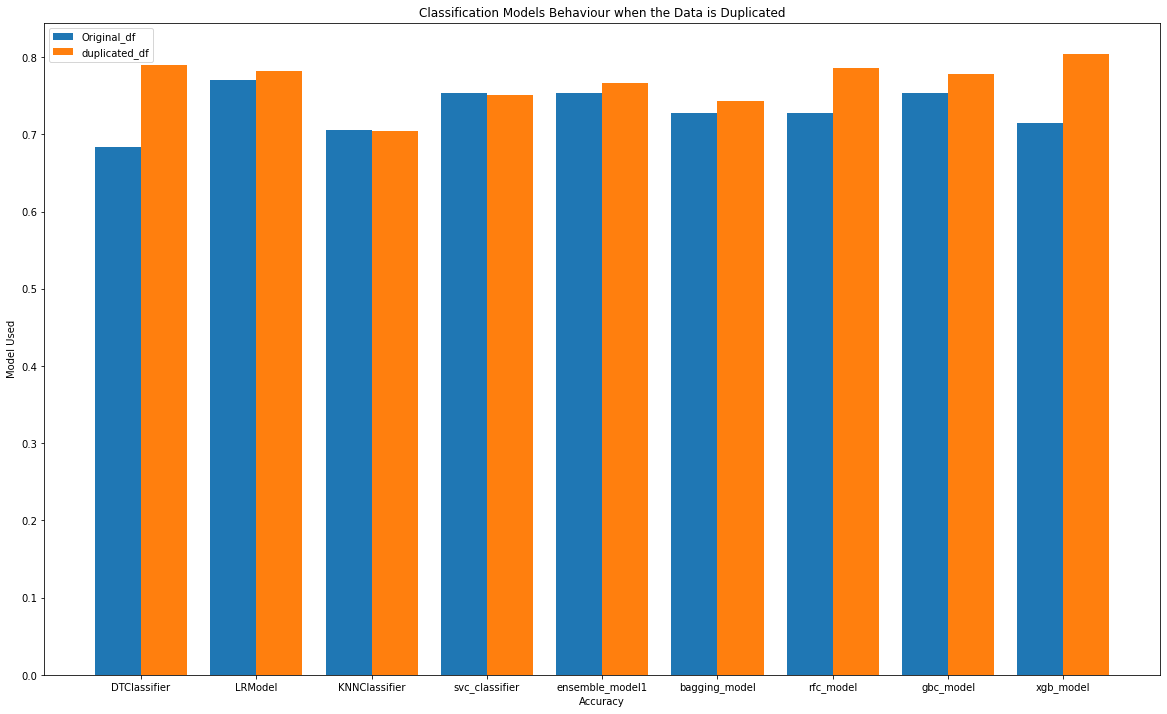

In [124]:
import matplotlib.pyplot as plt
import numpy as np
original_df_accuracies = [accuracy11, accuracy12, accuracy13,accuracy14,accuracy15,accuracy16,accuracy17,accuracy18,accuracy19]
duplicated_df_accuracies  = [accuracy21, accuracy22, accuracy23,accuracy24,accuracy25,accuracy26,accuracy27,accuracy28,accuracy29]

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(12)
model_names = ['DTClassifier','LRModel','KNNClassifier','svc_classifier','ensemble_model1','bagging_model','rfc_model','gbc_model','xgb_model']
X_axis = np.arange(len(model_names))
plt.bar(X_axis - 0.2,original_df_accuracies, 0.4, label = 'Original_df')
plt.bar(X_axis + 0.2,duplicated_df_accuracies, 0.4, label = 'duplicated_df')
plt.xticks(X_axis, model_names)
plt.title("Classification Models Behaviour when the Data is Duplicated")
plt.xlabel("Accuracy")
plt.ylabel("Model Used")
plt.legend()
plt.show()